____

# Trabajo Práctico Ciencia de Datos: Telco Churn - Exploratory Data Analysis

____


__Universidad Tecnológica Nacional, Buenos Aires__<br/>
__Ingeniería Industrial__<br/>
__Cátedra de Ciencia de Datos - Cluster AI__<br/>
__Elaborado por: Gaspar Rivollier__<br/>
__2023__<br/>
____

In [1]:
#Importamos librerías para EDA y Machine Learning en python
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importamos librerias de scikit learn
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn import preprocessing

# 3. EDA Exploración de datos

In [2]:
#Preparamos notebook para trabajar localmente o en GoogleCollab
# Verificamos si estamos en Colab
var_google_colab = 'google.colab' in str(get_ipython())
print(var_google_colab)
if var_google_colab:
  #Montamos nuestro G.Drive
  from google.colab import drive
  drive.mount('/content/gdrive',force_remount=True)
  # Direccion root donde está la jupyter-notebook
  root_path = "/content/gdrive/MyDrive/UTN/TP Cs Datos/preprocessed_telco_churn_clusterai.csv"
  # Direccion donde guardaremos las imagenes
  plot_path = root_path
else:
  # Si, no estamos en google colab, es que estamos corriendo la
  # en local.
  root_path = ""
  plot_path = root_path

True
Mounted at /content/gdrive


In [3]:
#Importamos
clients_df = pd.read_csv(root_path)

In [4]:
clients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 1276 non-null   int64  
 1   SeniorCitizen              1276 non-null   float64
 2   Partner                    1276 non-null   int64  
 3   Dependents                 1276 non-null   int64  
 4   tenure                     1276 non-null   float64
 5   PhoneService               1276 non-null   int64  
 6   MultipleLines              1276 non-null   int64  
 7   OnlineSecurity             1276 non-null   int64  
 8   OnlineBackup               1276 non-null   int64  
 9   DeviceProtection           1276 non-null   int64  
 10  TechSupport                1276 non-null   int64  
 11  StreamingTV                1276 non-null   int64  
 12  StreamingMovies            1276 non-null   int64  
 13  PaperlessBilling           1276 non-null   int64

In [5]:
#Dropeamos columna Unnamed: 0
clients_df = clients_df.drop('Unnamed: 0',axis=1)

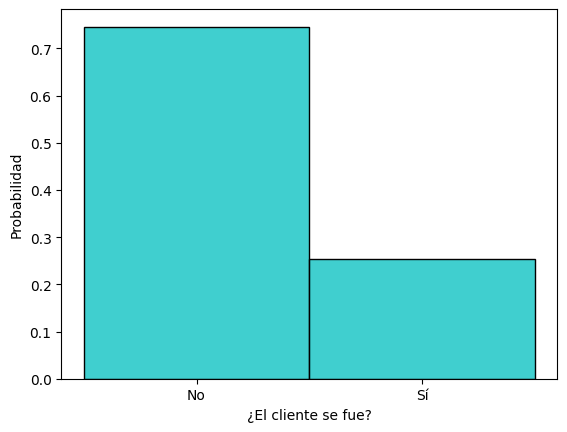

In [6]:
# Renombrar los valores en la columna 'Churn'
churn = clients_df['Churn'].replace({0: 'No', 1: 'Sí'})

#Sin titulo para informe
# Crear el histograma actualizado
sns.histplot(churn, bins=2, color='c', stat='probability')
plt.xlabel("¿El cliente se fue?")
plt.ylabel("Probabilidad")  # Cambiar la etiqueta del eje y
plt.xticks(["No", "Sí"])  # Actualizar las etiquetas del eje x
plt.show()

In [7]:
#Se puede ver una distribución de 75% aproximadamente de clientes que siguen en la compañía y 25% que han dejado.
#Probabilidad exacta
# Calcular la probabilidad de churn='No'
probabilidad_no_churn = churn.value_counts(normalize=True).get('No', 0)
print(f"La probabilidad de Churn='No' es: {probabilidad_no_churn:.2%}")

La probabilidad de Churn='No' es: 74.61%


In [8]:
#Encontramos datos descriptivos del dataframe
clients_df.describe().round(2).transpose().drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
SeniorCitizen,0.14,0.35,0.00,0.00,0.00,0.00,1.00
Partner,0.48,0.50,0.00,0.00,0.00,1.00,1.00
Dependents,0.32,0.46,0.00,0.00,0.00,1.00,1.00
tenure,32.22,22.87,0.00,11.00,32.54,51.00,72.00
PhoneService,0.91,0.28,0.00,1.00,1.00,1.00,1.00
MultipleLines,0.43,0.50,0.00,0.00,0.00,1.00,1.00
OnlineSecurity,0.27,0.44,0.00,0.00,0.00,1.00,1.00
OnlineBackup,0.32,0.46,0.00,0.00,0.00,1.00,1.00
DeviceProtection,0.29,0.46,0.00,0.00,0.00,1.00,1.00
TechSupport,0.24,0.43,0.00,0.00,0.00,0.00,1.00


In [ ]:
#Imprimos un pairplot del dataframe en función de variable Churn para detectar
#Correlaciones entre variables y outcome.
pairplot=sns.pairplot(clients_df, y_vars='Churn', hue='Churn', kind='hist')
plt.show()

In [ ]:
# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Crear un histograma para 'tenure' separado por 'Churn'
plot = sns.histplot(data=clients_df, x='tenure', hue='Churn', multiple='stack', bins=30, palette={0: 'blue', 1: 'lightblue'})

# Añadir etiquetas y título
plt.xlabel("Tenure")
plt.ylabel("Count")
plt.title("Histograma de 'Tenure' separado por 'Churn'")

# Añadir leyenda
plt.legend(title="Churn", labels=['No', 'Sí'])

# Mostrar el gráfico
plt.show()

In [ ]:
#Podemos ver que la mayor densidad de clientes que dejan la compañía son personas que tiene Tenure mas bajo mientras que los de mas alto tenure tienen menor tendencia a irse.


In [ ]:
# Suponiendo que tu DataFrame tiene las columnas 'MonthlyCharges' y 'Churn'

# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Crear un histograma para 'MonthlyCharges' separado por 'Churn'
plot = sns.histplot(data=clients_df, x='MonthlyCharges', hue='Churn', multiple='stack', bins=30, palette={0: 'blue', 1: 'lightblue'})

# Añadir etiquetas y título
plt.xlabel("Monthly Charges")
plt.ylabel("Count")
plt.title("Histograma de 'Monthly Charges' separado por 'Churn'")

# Añadir leyenda
plt.legend(title="Churn", labels=['No', 'Sí'])

# Mostrar el gráfico
plt.show()

In [ ]:
#Para estos casos vemos que para MonthlyCharges, menores valores dan mas posibilidad de no salir de la compañía para el caso de Total charges esto no ocurre.

In [ ]:
#Planteamos además una matriz de correlación
clients_corr = clients_df.corr()
#Analicemos con heatmap
plt.figure(figsize=(12,10))  # Adjust the figure size as needed
sns.heatmap(clients_corr, annot=False, cmap='coolwarm', xticklabels=clients_corr.columns, yticklabels=clients_corr.columns, annot_kws={"size": 5})
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title("Correlación de variables")
plt.show()

In [ ]:
#Preparamos correlation matrix con variables mas correlacionadas, para mayor visibilidad en informe

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'clients_df' es tu DataFrame
clients_corr = clients_df.corr()

# Seleccionar las variables con mayor correlación (excluyendo la variable "Churn", "Male" y "Female")
top_corr_variables = (clients_corr.abs()
                      .unstack()
                      .sort_values(ascending=False)
                      .reset_index()
                      .query("level_0 != level_1 and level_0 not in ['Male', 'Female'] and level_1 not in ['Male', 'Female']"))[:14]

# Obtener un conjunto único de variables
unique_variables = set(top_corr_variables['level_0']).union(set(top_corr_variables['level_1']))

# Filtrar la matriz de correlación original para incluir solo las variables seleccionadas
filtered_corr_matrix = clients_corr.loc[unique_variables, unique_variables]

# Visualizar la matriz de correlación con heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 15})

# Ajustar el tamaño de la fuente de las etiquetas en los ejes x e y
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

In [ ]:
#En relación a variable Churn podemos ver que variables con mayor correlación son Month-to-month, tenure (negativa), y en segundo plano Fiber optic y Electronic Check

In [ ]:
#Calculamos numéricamente variables más correlacionadas
corr_pares = clients_corr.unstack().sort_values(ascending=False)
top_corr_pares = corr_pares[corr_pares != 1].head(5)

variable1, variable2 = top_corr_pares.index[0]
variable3, variable4 = top_corr_pares.index[2]
variable5, variable6 = top_corr_pares.index[4]

print("Los 3 pares de variables más correlacionadas son:")
print(variable1, "y", variable2, "con una correlación de: ", clients_corr.loc[variable1, variable2])
print(variable3, "y", variable4, "con una correlación de: ", clients_corr.loc[variable3, variable4])
print(variable5, "y", variable6, "con una correlación de: ", clients_corr.loc[variable5, variable6])


In [ ]:
#Con esto podemos ver que el servicio de Fibra optica implica costos mensuales elevados, que clientes con mas antiguedad tienen mayores cargos totales y que a mayor costo mensual mayor costo total.

In [ ]:
#Profundizando en el análisis de tenure, podemos crear una variable temporal para dividir a los clientes en categorías según sus cuartiles
#Creamos variable
#Defino los límites para los rangos de tenure. Usamos 200 como tenure "maxima" para que queden incluidos todos los maximos.
tenure_rangos = [0, 10, 30, 50,200]
#Defino las etiquetas para los rangos
tenure_labels = ['Menor a 10 años', 'Entre 10 y 30 años', 'Entre 30 y 50 años', 'Mayor a 50 años']

#Utilizo pd.cut para llenar la columna 'tenure' con los rangos de edades
clients_df['tenureRange'] = pd.cut(clients_df['tenure'], bins=tenure_rangos, labels=tenure_labels)

#Ahora, la columna 'Age' contendrá los rangos de edades en lugar de las edades originales
#Usamos un head para mostrar el resultado de la operacion
clients_df.head(5)

#preparamos el countplot con x siendo el rango y separamos por Churn
plt.figure(figsize=(8, 8))  # Adjust the width and height as needed
sns.countplot(data=clients_df, x='tenureRange', hue='Churn')
#Ajusta el tamaño del gráfico
sns.set(rc={'figure.figsize':(6,6)})
#Seteamos labels relevantes y titulo de grafico
labels = {0: "Cliente se queda", 1: "Cliente se va"}
plt.legend(title='Cantidad de clientes que se quedan por rango de antigüedad', labels=[labels[0], labels[1]], loc='upper right')
#mostramos grafico
plt.show()

In [ ]:
#Aqui podemos ver de forma más gráfica como aumenta la probabilidad de continuidad del cliente con su antiguedad.

In [ ]:
#Removemos columna creada previo al modelo de aprendizaje
clients_df.drop("tenureRange", axis=1, inplace=True)

In [ ]:
#Guardamos como csv el dataframe
#Exportamos base pre procesada como csv para utilizarla en siguiente notebook
clients_df.to_csv('/content/gdrive/MyDrive/UTN/TP Cs Datos/post_eda_telco_churn_clusterai.csv')